## Question 1: Comprehensive Data Acquisition and Preprocessing 
**Task:** 
Download and preprocess CO2 emissions data along with a wide range of socio-economic 
and environmental indicators from the World Bank’s Climate Change database. 
 
**Instructions:** 
1. Access the World Bank database using Python, R, or MATLAB. 
2. Download CO2 emissions data and as many relevant socio-economic and environmental 
indicators as possible (e.g., GDP, population, energy consumption, urbanization rate, 
education level, etc.). 
3. Clean and preprocess the data, addressing missing values, outliers, and ensuring 
consistency across indicators. 
4. Provide a detailed summary of the dataset, including key statistics, correlations between 
variables, and any notable patterns or anomalies

**How to use**
- The API calls aren't working at the moment since we are obtaining a 502 error code from the World Bank Database server.
- You can run all the cell, just make sure to uncomment cell 5.
- Please refer to the deliverables folder and the `q1.md` file for an overview of the results of this first question.

In [47]:
from helpers import GetData, DataFrameAnalyzer, ManipulateData
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
%load_ext autoreload
%autoreload 2

## 1. Download the Data

In [3]:
data_getter = GetData()

In [4]:
# List of indicator ids that we will use in the project
indicators_id_ls = ['EG.USE.PCAP.KG.OE', 'NY.GDP.MKTP.CD', 'EN.ATM.CO2E.KT', 'SP.POP.TOTL', 'SP.URB.TOTL', 'SE.PRM.CMPT.ZS', 'EG.ELC.RNEW.ZS']
indicators_name_ls = ['energy_use', 'gdp', 'cotwo_emissions', 'popu_total', 'urban_popu', 'primary_completion_rate', 'renewable_elec_output']

# Uncomment the line below to requests the indicator's data to the World Bank API (Not working at the moment since the API returns a 502 Error code)
# data_getter.download_data(indicators_id_ls, 'raw_data')

In [5]:
# Unzip and rename csv files. Uncomment if its the first time you run the notebook

# data_getter.unzip_downloaded_files()
# data_getter.rename_csv_files(indicator_ids=indicators_id_ls)

Unzipped API_EG.ELC.RNEW.ZS_DS2_en_csv_v2_3436367.zip to raw_data/csv_files
Unzipped API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3403845.zip to raw_data/csv_files
Unzipped API_SP.POP.TOTL_DS2_en_csv_v2_3401680.zip to raw_data/csv_files
Unzipped API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3402138.zip to raw_data/csv_files
Unzipped API_SP.URB.TOTL_DS2_en_csv_v2_3425772.zip to raw_data/csv_files
Unzipped API_SE.ADT.LITR.ZS_DS2_en_csv_v2_3401708.zip to raw_data/csv_files
Unzipped API_SE.PRM.CMPT.ZS_DS2_en_csv_v2_3434717.zip to raw_data/csv_files
Unzipped API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_3408991.zip to raw_data/csv_files
All files unzipped successfully.
Renamed API_EG.USE.PCAP.KG.OE_DS2_en_csv_v2_3408991.csv to EG.USE.PCAP.KG.OE.csv
Renamed API_NY.GDP.MKTP.CD_DS2_en_csv_v2_3403845.csv to NY.GDP.MKTP.CD.csv
Renamed API_EN.ATM.CO2E.KT_DS2_en_csv_v2_3402138.csv to EN.ATM.CO2E.KT.csv
Renamed API_SP.POP.TOTL_DS2_en_csv_v2_3401680.csv to SP.POP.TOTL.csv
Renamed API_SP.URB.TOTL_DS2_en_csv_v2_3425772.csv to SP.URB.TO

In [6]:
# Create a dictionary of dataframes
csv_files = {}
for indicator_name, indicator_id in list(zip(indicators_name_ls, indicators_id_ls)):
    print(indicator_name, indicator_id)
    csv_files[indicator_name] = f'raw_data/csv_files/{indicator_id}.csv'

print(csv_files)

data_frames = {var_name: pd.read_csv(file_path, skiprows=4) for var_name, file_path in csv_files.items()}

energy_use EG.USE.PCAP.KG.OE
gdp NY.GDP.MKTP.CD
cotwo_emissions EN.ATM.CO2E.KT
popu_total SP.POP.TOTL
urban_popu SP.URB.TOTL
primary_completion_rate SE.PRM.CMPT.ZS
renewable_elec_output EG.ELC.RNEW.ZS
{'energy_use': 'raw_data/csv_files/EG.USE.PCAP.KG.OE.csv', 'gdp': 'raw_data/csv_files/NY.GDP.MKTP.CD.csv', 'cotwo_emissions': 'raw_data/csv_files/EN.ATM.CO2E.KT.csv', 'popu_total': 'raw_data/csv_files/SP.POP.TOTL.csv', 'urban_popu': 'raw_data/csv_files/SP.URB.TOTL.csv', 'primary_completion_rate': 'raw_data/csv_files/SE.PRM.CMPT.ZS.csv', 'renewable_elec_output': 'raw_data/csv_files/EG.ELC.RNEW.ZS.csv'}


In [7]:
analyzer = DataFrameAnalyzer()

In [8]:
# Prints the shapes of all the loaded dataframes
analyzer.print_shape(data_frames)

Shape of energy_use: (266, 69)
Shape of gdp: (266, 69)
Shape of cotwo_emissions: (266, 69)
Shape of popu_total: (266, 69)
Shape of urban_popu: (266, 69)
Shape of primary_completion_rate: (266, 69)
Shape of renewable_elec_output: (266, 69)


## 2. Data Cleaning

In [9]:
# Creating a subset of countries based on the OECD members to simplify the data cleaning and analysis
manipulate_data = ManipulateData()
data_frames = manipulate_data.create_oecd_country_subset(dataframe_dict=data_frames)

In [10]:
# Checking new shapes
analyzer.print_shape(data_frames)


Shape of energy_use: (39, 69)
Shape of gdp: (39, 69)
Shape of cotwo_emissions: (39, 69)
Shape of popu_total: (39, 69)
Shape of urban_popu: (39, 69)
Shape of primary_completion_rate: (39, 69)
Shape of renewable_elec_output: (39, 69)


In [11]:
# We focus on checking the CO2 emissions dataset first and we will make adjustments on all the other dfs based on the ones made on this one.
data_frames['cotwo_emissions'].head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Australia,AUS,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,385782.4,394803.6,397149.4,396059.9,395199.1,378996.8,NaN,NaN,NaN,NaN
1,Austria,AUT,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,63254.7,63697.1,65867.7,63131.4,64497.8,59142.4,NaN,NaN,NaN,NaN
2,Belgium,BEL,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,95096.0,94171.6,92587.4,93523.2,92989.4,85364.1,NaN,NaN,NaN,NaN
3,Canada,CAN,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,558747.2,556874.1,568175.9,579573.9,566001.8,516873.7,NaN,NaN,NaN,NaN
4,Switzerland,CHE,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,39090.8,39666.5,38699.0,37481.3,37376.3,34916.1,NaN,NaN,NaN,NaN


In [12]:
analyzer.print_info(data_frames)

Info of energy_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1960            26 non-null     float64
 5   1961            26 non-null     float64
 6   1962            26 non-null     float64
 7   1963            26 non-null     float64
 8   1964            26 non-null     float64
 9   1965            27 non-null     float64
 10  1966            27 non-null     float64
 11  1967            27 non-null     float64
 12  1968            27 non-null     float64
 13  1969            27 non-null     float64
 14  1970            27 non-null     float64
 15  1971            35 non-null     float64
 16  1972            35 non-null     float64
 17  1973            3

In [13]:
# Dropping the year columns that are all filled by null values
cotwo_clean_df = data_frames['cotwo_emissions'].dropna(axis=1, how='all')
cotwo_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            39 non-null     float

In [14]:
# Make all other dataframes consistent with the modifications of the CO2 emissions df
data_frames['cotwo_emissions'] = cotwo_clean_df
analyzer.check_column_names_equal(dataframes=data_frames)
data_frames = manipulate_data.modify_dataframes_based_on_a_target_dataframe(dataframe_dict=data_frames)

The dataframe energy_use has different column names
The dataframe gdp has different column names
- All columns are equal -
The dataframe popu_total has different column names
The dataframe urban_popu has different column names
The dataframe primary_completion_rate has different column names
The dataframe renewable_elec_output has different column names


In [15]:
analyzer.check_column_names_equal(data_frames)

- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -
- All columns are equal -


In [16]:
analyzer.print_shape(data_frames)

Shape of energy_use: (39, 35)
Shape of gdp: (39, 35)
Shape of cotwo_emissions: (39, 35)
Shape of popu_total: (39, 35)
Shape of urban_popu: (39, 35)
Shape of primary_completion_rate: (39, 35)
Shape of renewable_elec_output: (39, 35)


In [17]:
analyzer.print_info(data_frames)

Info of energy_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            3

In [18]:
# We've noticed that some of the dataframes have a lot of missing values in the latest years (2015 - 2020)
# We are dropping those years and we ensure consitency in all dataframes
data_frames['energy_use'] = data_frames['energy_use'].dropna(axis=1, how='all')
data_frames = manipulate_data.modify_dataframes_based_on_a_target_dataframe(dataframe_dict=data_frames, target_dataframe_name='energy_use')
analyzer.print_shape(data_frames)

Shape of energy_use: (39, 30)
Shape of gdp: (39, 30)
Shape of cotwo_emissions: (39, 30)
Shape of popu_total: (39, 30)
Shape of urban_popu: (39, 30)
Shape of primary_completion_rate: (39, 30)
Shape of renewable_elec_output: (39, 30)


In [19]:
analyzer.print_info(data_frames)

Info of energy_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            36 non-null     float64
 5   1991            36 non-null     float64
 6   1992            36 non-null     float64
 7   1993            37 non-null     float64
 8   1994            37 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            39 non-null     float

In [23]:
# The remaining missing values are imputed using interpolation
data_frames = manipulate_data.impute_data(data_frames)
analyzer.print_info(data_frames)

Info of energy_use:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    39 non-null     object 
 1   Country Code    39 non-null     object 
 2   Indicator Name  39 non-null     object 
 3   Indicator Code  39 non-null     object 
 4   1990            39 non-null     float64
 5   1991            39 non-null     float64
 6   1992            39 non-null     float64
 7   1993            39 non-null     float64
 8   1994            39 non-null     float64
 9   1995            39 non-null     float64
 10  1996            39 non-null     float64
 11  1997            39 non-null     float64
 12  1998            39 non-null     float64
 13  1999            39 non-null     float64
 14  2000            39 non-null     float64
 15  2001            39 non-null     float64
 16  2002            39 non-null     float64
 17  2003            3

In [25]:
analyzer.print_describe(data_frames)

Description of energy_use:
              1990         1991         1992         1993         1994  \
count    39.000000    39.000000    39.000000    39.000000    39.000000   
mean   3815.908325  3802.904674  3674.589806  3681.960581  3702.826193   
std    2063.977806  2032.138684  1967.442691  2021.395422  2025.409273   
min     531.126860   549.446289   691.794762   688.600834   662.147135   
25%    2522.176764  2519.371811  2482.357776  2476.832915  2421.350357   
50%    3597.051621  3637.194120  3561.890369  3490.886554  3494.447149   
75%    4803.404363  4765.752251  4392.849372  4340.151468  4358.144295   
max    8907.791984  9353.421189  9262.081979  9266.942575  8823.252466   

              1995         1996         1997         1998          1999  ...  \
count    39.000000    39.000000    39.000000    39.000000     39.000000  ...   
mean   3723.976049  3852.558907  3856.095682  3857.677351   3883.364591  ...   
std    1935.261483  1993.718647  1953.911547  1965.166690   2073.4

## 3. Data Analysis

In [32]:
# Create a new dataframe with the OECD members data for each indicator for further analysis
oecd_data_df = manipulate_data.create_oecd_dataframe(data_frames)
oecd_data_df.head()


,energy_use,gdp,cotwo_emissions,popu_total,urban_popu,primary_completion_rate,renewable_elec_output
1990,4141.578265,1.884697e+13,11344058.36,1.104792e+09,806920692.0,96.470642,17.517699
1991,4148.818678,1.995376e+13,11389105.28,1.115757e+09,818086250.0,96.054222,17.156024
1992,4146.560828,2.146475e+13,11422717.80,1.126417e+09,828873390.0,97.559067,17.032222
1993,4169.720783,2.179581e+13,11511913.66,1.136605e+09,839411038.0,97.351517,17.688809
1994,4204.493628,2.329764e+13,11707010.04,1.146215e+09,849629868.0,97.834900,16.770369


In [34]:
oecd_data_df.describe()

,energy_use,gdp,cotwo_emissions,popu_total,urban_popu,primary_completion_rate,renewable_elec_output
count,26.000000,2.600000e+01,2.600000e+01,2.600000e+01,2.600000e+01,26.000000,26.000000
mean,4276.778525,3.410616e+13,1.240324e+07,1.221924e+09,9.374380e+08,99.028402,17.477318
std,143.465971,1.077958e+13,5.959833e+05,6.866032e+07,7.998576e+07,1.276751,2.253925
min,4026.650028,1.884697e+13,1.134406e+07,1.104792e+09,8.069207e+08,96.054222,15.060698
25%,4142.823906,2.570470e+13,1.206873e+07,1.167004e+09,8.718091e+08,98.474457,15.872453
50%,4301.557011,3.029353e+13,1.248465e+07,1.222910e+09,9.361024e+08,98.903728,17.060931
75%,4403.203181,4.484386e+13,1.288379e+07,1.280268e+09,1.006598e+09,100.060101,17.727429
max,4476.109157,5.038691e+13,1.328968e+07,1.330317e+09,1.064137e+09,100.941177,23.335963


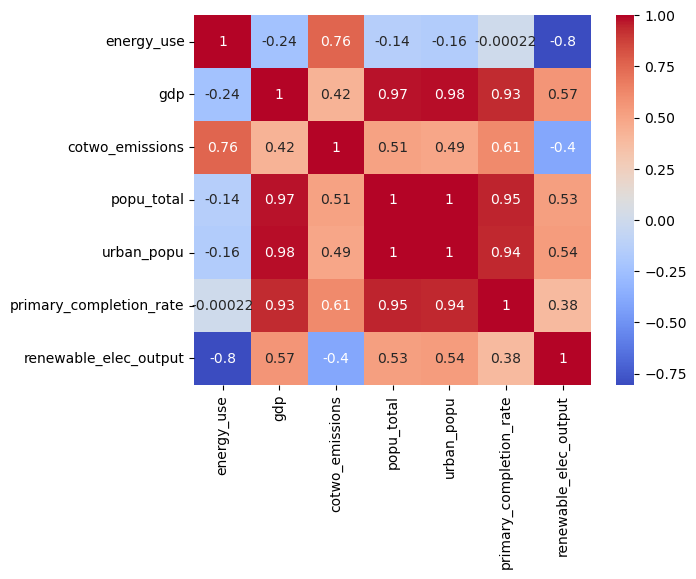

In [41]:
sns.heatmap(oecd_data_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [49]:
oecd_data_df.corr()

,energy_use,gdp,cotwo_emissions,popu_total,urban_popu,primary_completion_rate,renewable_elec_output
energy_use,1.000000,-0.236418,0.756907,-0.141271,-0.163088,-0.000218,-0.804902
gdp,-0.236418,1.000000,0.424920,0.973795,0.979074,0.930858,0.569083
cotwo_emissions,0.756907,0.424920,1.000000,0.510288,0.492022,0.614550,-0.396383
popu_total,-0.141271,0.973795,0.510288,1.000000,0.999469,0.947026,0.527073
urban_popu,-0.163088,0.979074,0.492022,0.999469,1.000000,0.942910,0.540428
primary_completion_rate,-0.000218,0.930858,0.614550,0.947026,0.942910,1.000000,0.383124
renewable_elec_output,-0.804902,0.569083,-0.396383,0.527073,0.540428,0.383124,1.000000


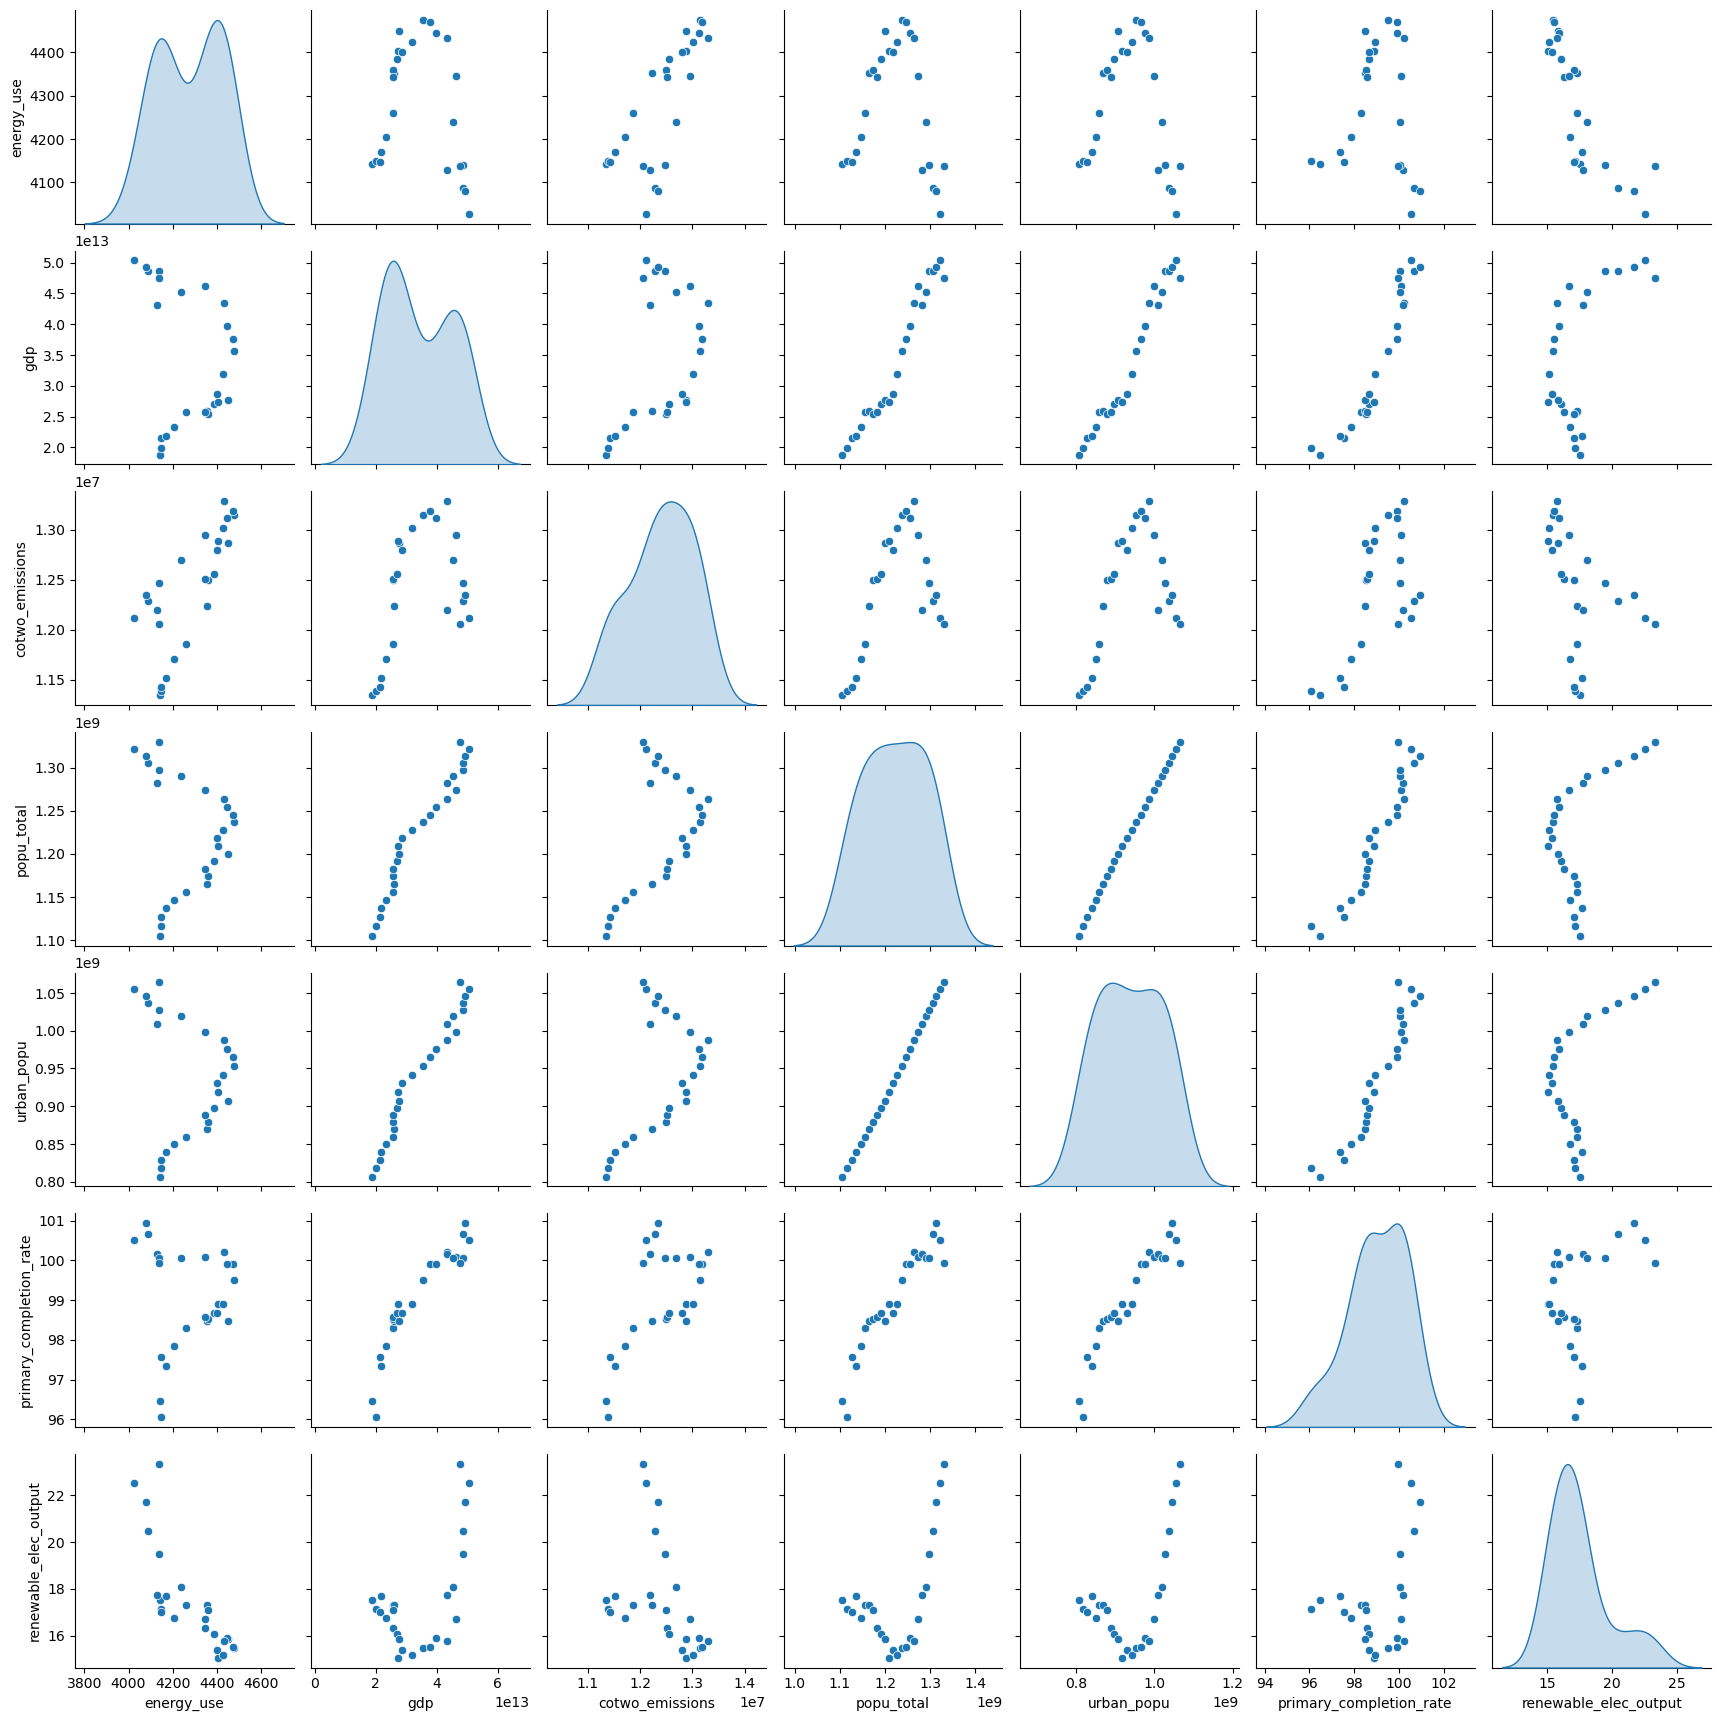

In [44]:
sns.pairplot(oecd_data_df, diag_kind='kde')
plt.show()

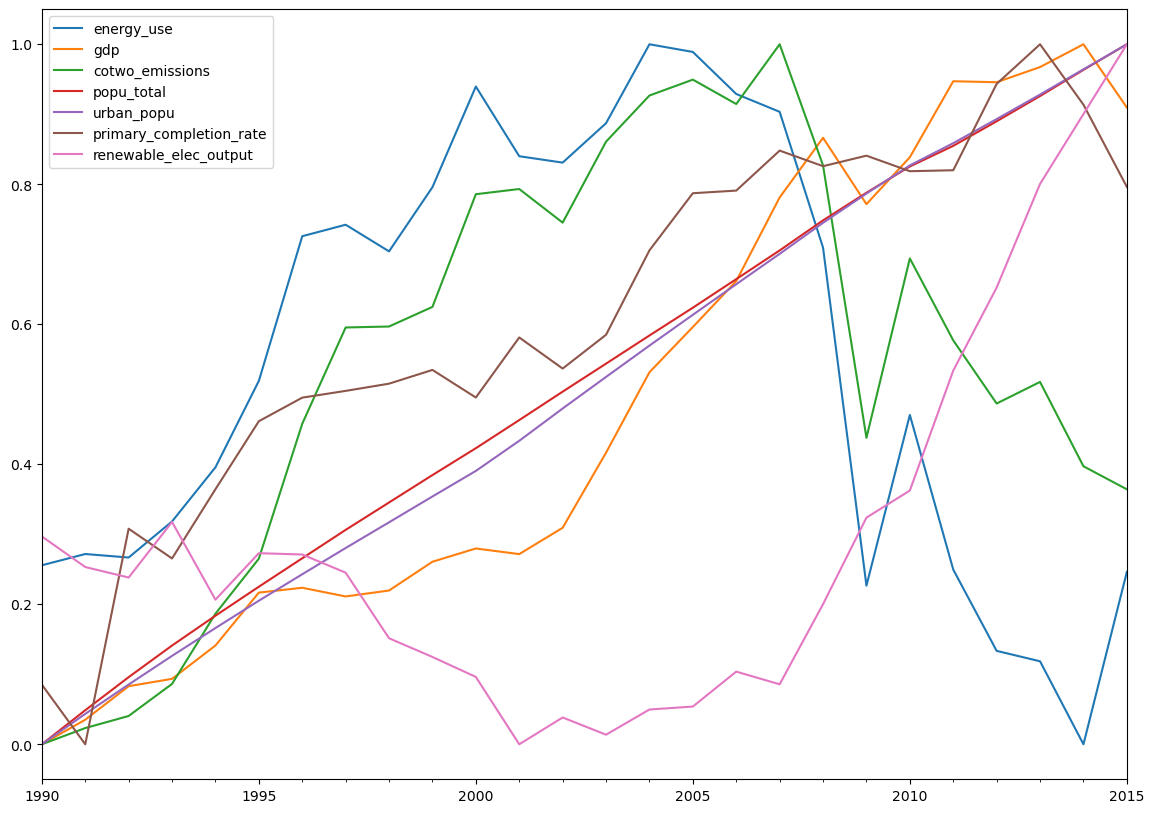

In [48]:
min_max_scaler = MinMaxScaler()
oecd_norm_df = pd.DataFrame(min_max_scaler.fit_transform(oecd_data_df), columns=oecd_data_df.columns, index=oecd_data_df.index)

oecd_norm_df.index = pd.to_datetime(oecd_data_df.index, format='%Y')
oecd_norm_df.plot(figsize=(14, 10))
plt.legend(loc='best')
plt.show()


In [50]:
oecd_norm_df

,energy_use,gdp,cotwo_emissions,popu_total,urban_popu,primary_completion_rate,renewable_elec_output
1990-01-01,0.255703,0.000000,0.000000,0.000000,0.000000,0.085211,0.296909
1991-01-01,0.271813,0.035092,0.023153,0.048620,0.043409,0.000000,0.253203
1992-01-01,0.266789,0.082999,0.040429,0.095891,0.085347,0.307931,0.238243
1993-01-01,0.318318,0.093495,0.086273,0.141065,0.126315,0.265461,0.317586
1994-01-01,0.395684,0.141112,0.186548,0.183674,0.166044,0.364374,0.206600
1995-01-01,0.519116,0.216688,0.265176,0.225075,0.205109,0.461519,0.273006
1996-01-01,0.725822,0.223603,0.457846,0.265712,0.242897,0.495200,0.271076
1997-01-01,0.742209,0.211185,0.595431,0.306280,0.280394,0.504842,0.245182
1998-01-01,0.704163,0.219657,0.596807,0.345409,0.317086,0.515157,0.151452
1999-01-01,0.795863,0.260753,0.624831,0.384583,0.354006,0.534790,0.124744
